<a href="https://colab.research.google.com/github/ahmedshuvo969/quora-insincere-questions-classification/blob/master/Copy_of_cosine_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import os
import nltk
import string
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
train=pd.read_csv('train.csv')

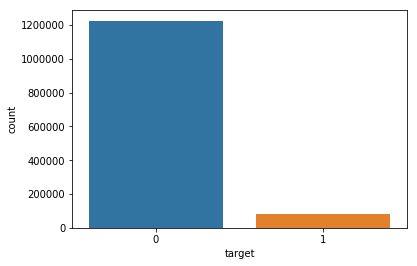

In [0]:
sns.countplot(train['target'])

In [0]:
len_data = len(train['target'])
count_sin = 0
for i in range(len_data):
    if train['target'][i] == 1:
        count_sin += 1
count_insin = len_data - count_sin

print('percent of sincere is : ', (count_sin/len_data)*100)
print('percent of insincere is : ', (count_insin/len_data)*100)

percent of sincere is :  6.187017751787352
percent of insincere is :  93.81298224821265


In [0]:
train.isnull().sum() #absent of missing value

qid              0
question_text    0
target           0
dtype: int64

In [0]:
#for train corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 

corpus = []
for i in range(0, len_data):
    review = re.sub('[^a-zA-Z]', ' ', train['question_text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

y_train = []    
for i in range(0, len_data):
    y_train.append(train['target'][i])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(corpus, y_train, test_size = 0.2, random_state = 0)

In [0]:
PosSet = []
NegSet = []

k = 0
for i in xTrain:
    m = i.split(" ")
    if yTrain[k] == 1: 
        for j in m:
            PosSet.append(j)
    else:
        for j in m:
            NegSet.append(j)
    k = k+1


PosSet = ' '.join(PosSet)
NegSet = ' '.join(NegSet)



doc = [PosSet, NegSet]

In [0]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
matrix1 = vectorizer.fit_transform(doc)



In [0]:
matrix2 = vectorizer.transform(xTest)

In [0]:

from sklearn.metrics.pairwise import cosine_similarity
rel = cosine_similarity(matrix2, matrix1)

In [0]:
y_pred = []
len_text_data = len(xTest)

for i in range(0, len_text_data):
 
  if rel[i][0]>rel[i][1]:
      y_pred.append(1)
  else:
      y_pred.append(0)

In [0]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest, y_pred)
print(cm)

[[201242  43907]
 [  3749  12327]]


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yTest, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yTest, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yTest, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yTest, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.817567
Precision: 0.219209
Recall: 0.766795
F1 score: 0.340949
